In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Average (Mean) ##

In [2]:
values = make_array(2, 3, 3, 9)

In [3]:
sum(values)/len(values)

4.25

In [4]:
np.average(values)

4.25

In [5]:
np.mean(values)

4.25

In [6]:
(2 + 3 + 3 + 9)/4

4.25

In [7]:
2*(1/4) + 3*(2/4) + 9*(1/4)

4.25

In [8]:
values_table = Table().with_columns('value', values)
values_table

value
2
3
3
9


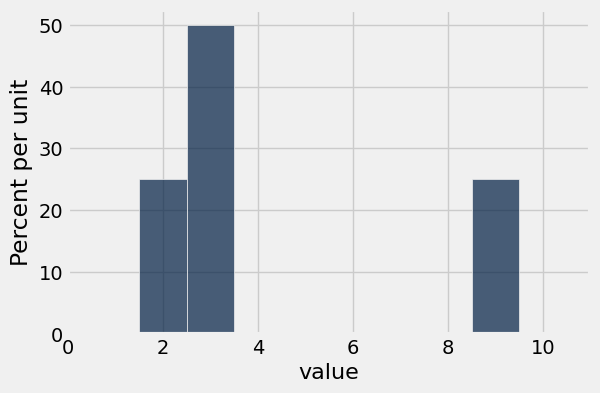

In [9]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist('value', bins = bins_for_display)

In [10]:
## Make array of 10 2s, 20 3s, and 10 9s

new_vals = make_array(2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                      9, 9, 9, 9, 9, 9, 9, 9, 9, 9)

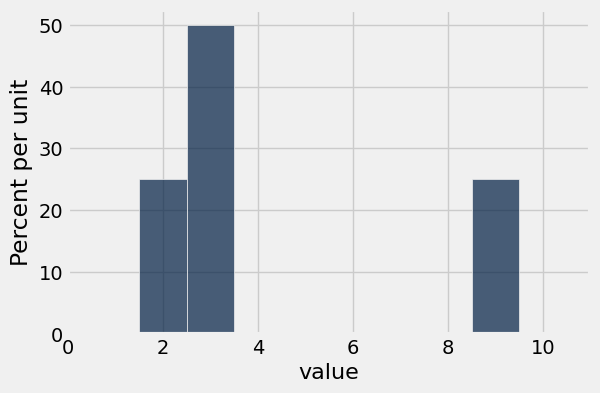

In [11]:
Table().with_column('value', new_vals).hist(bins = bins_for_display)

In [12]:
np.average(values)

4.25

In [13]:
np.average(new_vals)

4.25

## Standard Deviation ##

In [14]:
sd_table = Table().with_columns('Value', values)
sd_table

Value
2
3
3
9


In [15]:
average_value = np.average(sd_table.column(0))
average_value

4.25

In [16]:
deviations = values - average_value
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

Value,Deviation
2,-2.25
3,-1.25
3,-1.25
9,4.75


In [17]:
sum(deviations)

0.0

In [18]:
sd_table = sd_table.with_columns('Squared Deviation', deviations ** 2)
sd_table

Value,Deviation,Squared Deviation
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


In [19]:
# Variance of the data

variance = np.mean(sd_table.column('Squared Deviation'))
variance

7.6875

In [20]:
# Standard Deviation (SD) is the square root of the variance

sd = variance ** 0.5
sd

2.7726341266023544

In [21]:
np.std(values)

2.7726341266023544

## Chebyshev's Bound

In [22]:
births = Table.read_table('baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


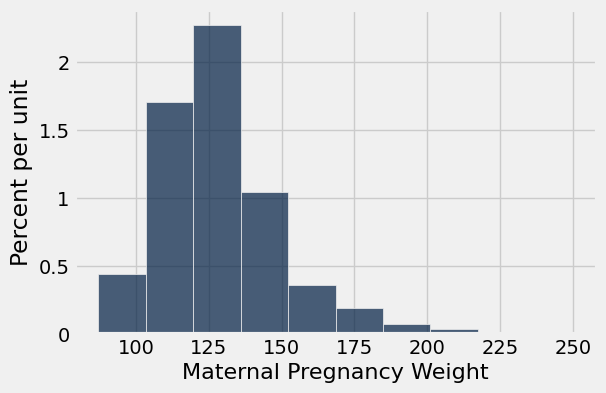

In [23]:
births.select(4).hist()

In [24]:
np.average(births.column(4))

128.4787052810903

In [25]:
np.std(births.column(4))

20.725449704280411

In [26]:
mpw = births.column('Maternal Pregnancy Weight')
mean = np.mean(mpw)
sd = np.std(mpw)
mean, sd

(128.4787052810903, 20.725449704280411)

In [27]:
within_3_SDs = births.where('Maternal Pregnancy Weight', are.between(mean - 3*sd, mean + 3*sd))

In [28]:
# Proportion within 3 SDs of the mean

within_3_SDs.num_rows / births.num_rows

0.9863713798977853

In [29]:
# Chebyshev's bound: 
# The proportion we calculated above should be at least

1 - 1/(3**2)

0.8888888888888888

In [30]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight',
 'Maternal Smoker')

In [31]:
# See if Chebyshev's bounds work for distributions with various shapes

for feature in births.labels:
    values = births.column(feature)
    mean = np.mean(values)
    sd = np.std(values)
    print()
    print(feature)
    for z in make_array(2, 3, 4, 5):
        chosen = births.where(feature, are.between(mean - z*sd, mean + z*sd))
        proportion = chosen.num_rows / births.num_rows
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '% of the data')


Birth Weight
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.57 % of the data
Average plus or minus 4 SDs: 100.0 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Gestational Days
Average plus or minus 2 SDs: 93.78 % of the data
Average plus or minus 3 SDs: 98.64 % of the data
Average plus or minus 4 SDs: 99.57 % of the data
Average plus or minus 5 SDs: 99.83 % of the data

Maternal Age
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.91 % of the data
Average plus or minus 4 SDs: 100.0 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Maternal Height
Average plus or minus 2 SDs: 97.19 % of the data
Average plus or minus 3 SDs: 99.66 % of the data
Average plus or minus 4 SDs: 99.91 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Maternal Pregnancy Weight
Average plus or minus 2 SDs: 95.06 % of the data
Average plus or minus 3 SDs: 98.64 % of the data
Average plus or minus 4 SDs:

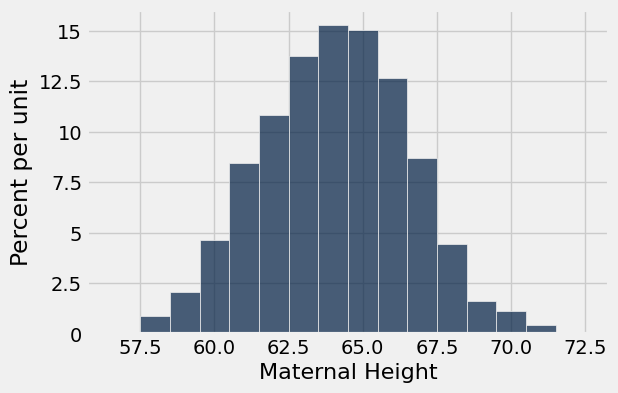

In [32]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

In [33]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

(64.049403747870528, 2.5250254409674375)

In [34]:
np.mean(heights) + np.std(heights), np.mean(heights) - np.std(heights)

(66.574429188837968, 61.524378306903088)

## Standard Units ##

In [35]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x)) / np.std(x)

In [36]:
ages = births.column('Maternal Age')

In [37]:
ages_standard_units = standard_units(ages)

In [38]:
np.mean(ages_standard_units), np.std(ages_standard_units)

(-7.868020072300939e-17, 1.0)

In [39]:
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


In [40]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.8153604041908968)

In [41]:
np.mean(ages_standard_units), np.std(ages_standard_units)

(-7.868020072300939e-17, 1.0)

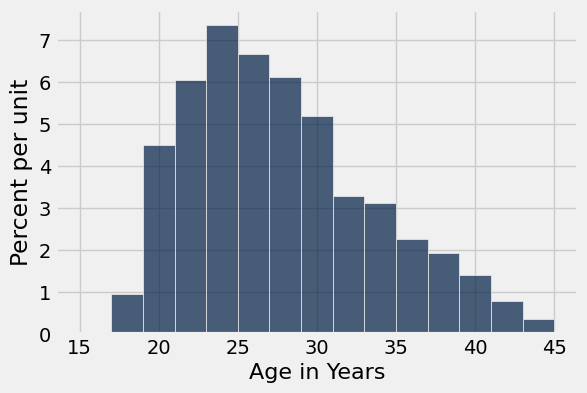

In [42]:
both.hist('Age in Years', bins = np.arange(15, 46, 2))

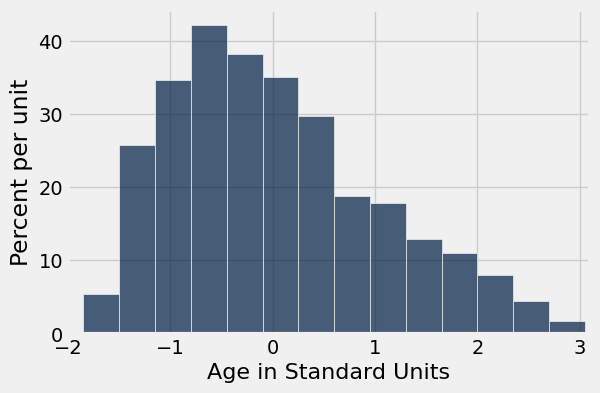

In [43]:
both.hist('Age in Standard Units', bins = np.arange(-2.2, 3.4, 0.35))
plots.xlim(-2, 3.1);

In [44]:
exams = Table.read_table('exams_fa18.csv')
exams.show(5)

Midterm,Final
91,88
89.5,84
78,71.5
87,88
72,72.5


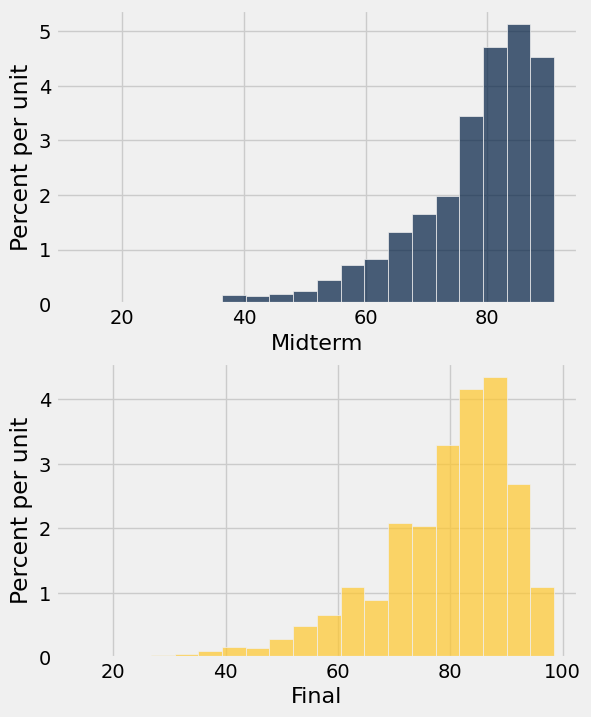

In [45]:
exams.hist(overlay=False, bins=20)

In [46]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.average(x)) / np.std(x)

In [47]:
midterm_su = standard_units(exams.column('Midterm'))
exams = exams.with_column('Midterm in Standard Units', midterm_su)

final_su = standard_units(exams.column('Final'))
exams = exams.with_column('Final in Standard Units', final_su)

exams.show(10)

Midterm,Final,Midterm in Standard Units,Final in Standard Units
91,88,1.16278,0.717241
89.5,84,1.03032,0.390935
78,71.5,0.0147889,-0.628768
87,88,0.809552,0.717241
72,72.5,-0.515053,-0.547191
71.5,61,-0.559206,-1.48532
82,92.5,0.368017,1.08433
84.5,87,0.588784,0.635664
85,92,0.632938,1.04355
78,71,0.0147889,-0.669556


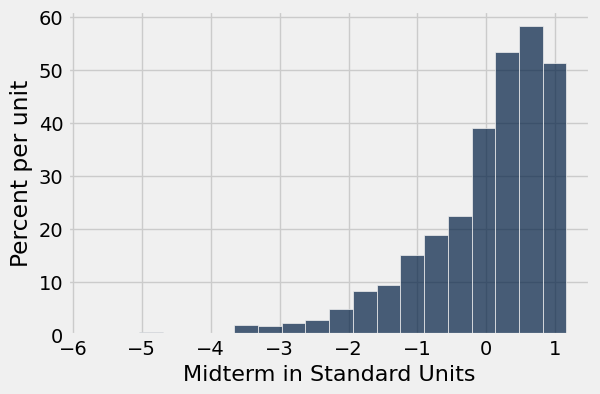

In [48]:
exams.hist('Midterm in Standard Units', bins=20)

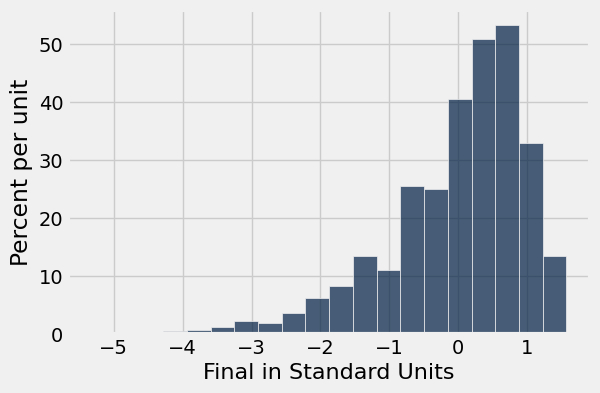

In [49]:
exams.hist('Final in Standard Units', bins=20)

## Central Limit Theorem ##

In [50]:
united = Table.read_table('united.csv')
united_bins = np.arange(-20, 300, 10)
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


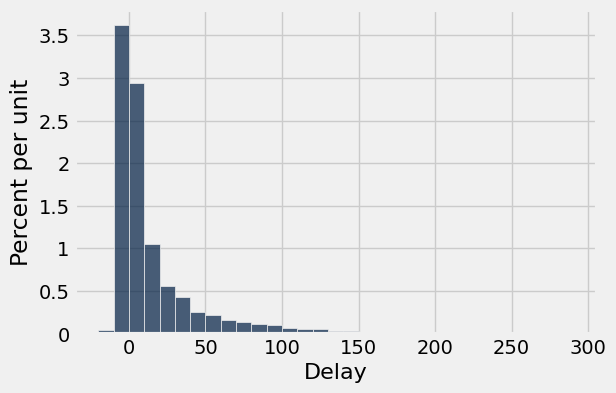

In [51]:
united.hist('Delay', bins=united_bins)

In [52]:
delays = united.column('Delay')
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
delay_mean, delay_sd

(16.658155515370705, 39.480199851609314)

In [53]:
percentile(50, delays)

2

In [54]:
def one_sample_mean(sample_size):
    """ Takes a sample from the population of flights and computes its mean"""
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [55]:
one_sample_mean(100)

19.170000000000002

In [56]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [57]:
sample_means_100 = ten_thousand_sample_means(100)

In [58]:
sample_means_100

array([ 15.83,  11.64,   6.45, ...,  18.02,  11.79,  19.58])

In [59]:
len(sample_means_100)

10000

Population Average: 16.6581555154


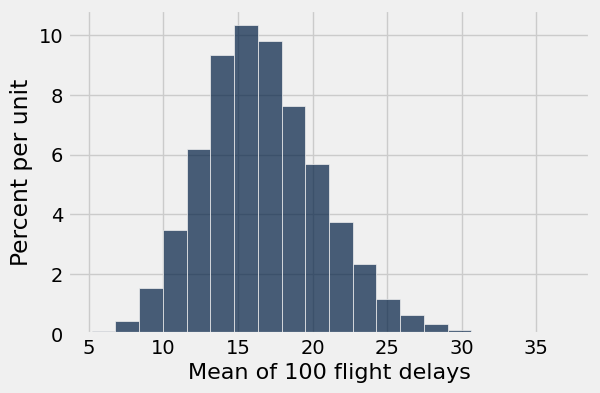

In [60]:
Table().with_column('Mean of 100 flight delays', sample_means_100).hist(bins=20)

print('Population Average:', delay_mean)

Population Average: 16.6581555154


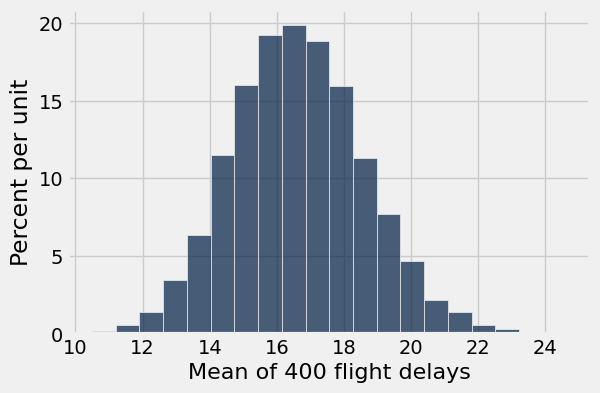

In [61]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 flight delays', sample_means_400).hist(bins=20)
print('Population Average:', delay_mean)

In [62]:
sample_means_900 = ten_thousand_sample_means(900)

Population Average: 16.6581555154


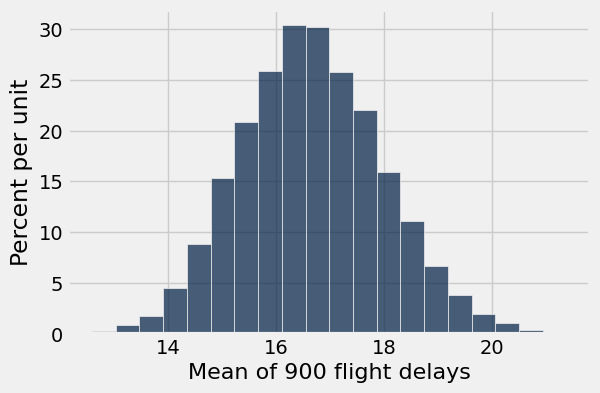

In [63]:
Table().with_column('Mean of 900 flight delays', sample_means_900).hist(bins=20)
print('Population Average:', delay_mean)

## Distribution of the Sample Average

In [64]:
means_tbl = Table().with_columns(
    '400', sample_means_400,
    '900', sample_means_900,
)

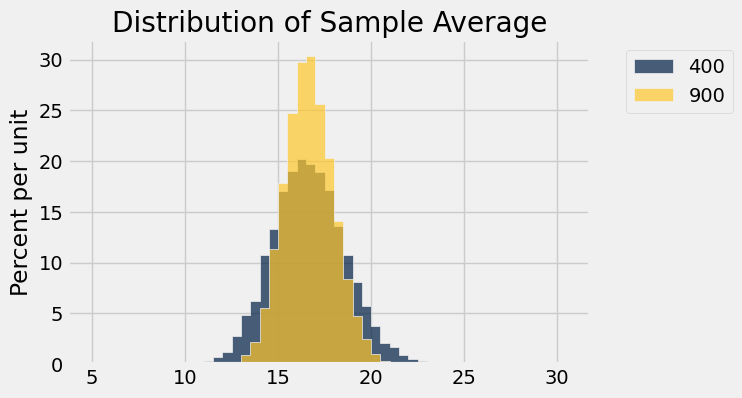

In [65]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.title('Distribution of Sample Average');

In [66]:
delay_mean = np.mean(united.column('Delay'))
delay_sd = np.std(united.column('Delay'))

In [67]:
"""Empirical distribution of random sample means"""

def plot_and_summarize_sample_means(sample_size):
    sample_means = ten_thousand_sample_means(sample_size)
    sample_means_tbl = Table().with_column('Sample Means', sample_means)
    
    # Print some information about the distribution of the sample means
    print("Sample size: ", sample_size)
    print("Population mean:", delay_mean)
    print("Average of sample means: ", np.mean(sample_means))
    print("Population SD:", delay_sd)
    print("SD of sample means:", np.std(sample_means))

    # Plot a histogram of the sample means
    sample_means_tbl.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))

Sample size:  100
Population mean: 16.6581555154
Average of sample means:  16.65401
Population SD: 39.4801998516
SD of sample means: 3.97466654198


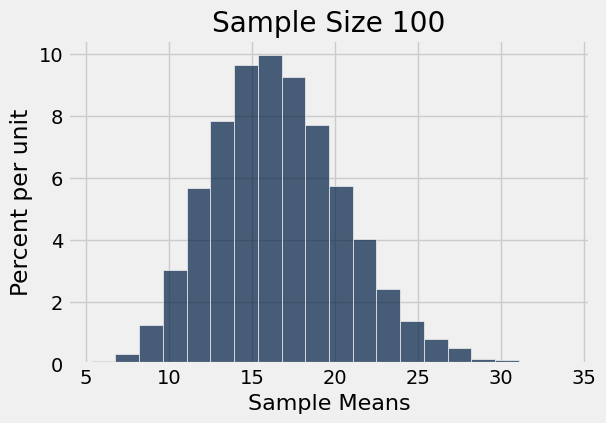

In [68]:
plot_and_summarize_sample_means(100)

In [69]:
39.48 / 3.932

10.040691759918616

Sample size:  400
Population mean: 16.6581555154
Average of sample means:  16.7043785
Population SD: 39.4801998516
SD of sample means: 1.97870696384


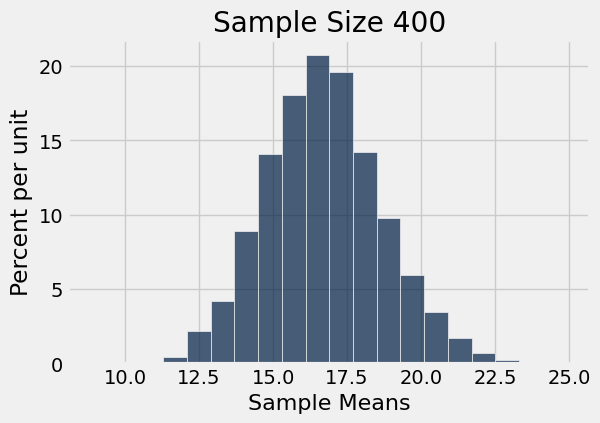

In [70]:
plot_and_summarize_sample_means(400)

In [71]:
39.48 / 1.973

20.010136847440442

Sample size:  625
Population mean: 16.6581555154
Average of sample means:  16.67704912
Population SD: 39.4801998516
SD of sample means: 1.58525222508


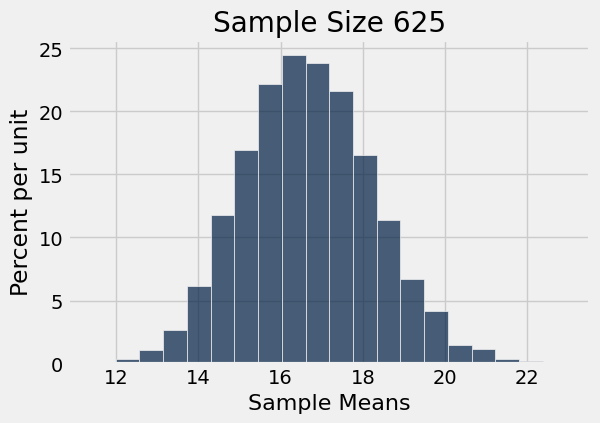

In [72]:
plot_and_summarize_sample_means(625)

In [73]:
39.48 / 1.577

25.034876347495242

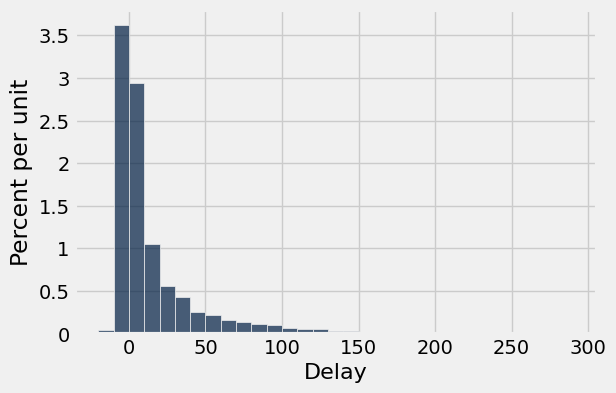

In [74]:
united.hist('Delay', bins = np.arange(-20, 300, 10))

In [75]:
delays = united.column('Delay')
population_mean = np.mean(delays)
population_sd = np.std(delays)

population_mean, population_sd

(16.658155515370705, 39.480199851609314)

## SD of the sample mean

In [76]:
def one_sample_mean(sample_size):
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [77]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        means = np.append(means, one_sample_mean(sample_size))
    return means

In [78]:
"""Empirical distribution of random sample means"""

def plot_sample_means(sample_size):
    means = ten_thousand_sample_means(sample_size)
    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(united.column('Delay')))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(united.column('Delay')))
    print("SD of sample means:", np.std(means))

In [79]:
# Warning: this cell will take a long time to run!
#sample_sizes = np.arange(100, 950, 50)

#sample_mean_sds = make_array()
#for n in sample_sizes:
#    sample_means = ten_thousand_sample_means(n)
#    sample_mean_sds = np.append(sample_mean_sds, np.std(sample_means))

In [80]:
sd_table = Table().with_columns(
    'Sample size', sample_sizes,
    'SD of simulated sample means', sample_mean_sds,
    'Pop SD / sqrt(sample size)', population_sd / np.sqrt(sample_sizes),
)
sd_table

Sample size,SD of simulated sample means,Pop SD / sqrt(sample size)
100,3.94578,3.94802
150,3.23842,3.22354
200,2.80327,2.79167
250,2.48626,2.49695
300,2.28043,2.27939
350,2.11282,2.11031
400,1.97193,1.97401
450,1.87116,1.86111
500,1.75851,1.76561
550,1.67472,1.68344


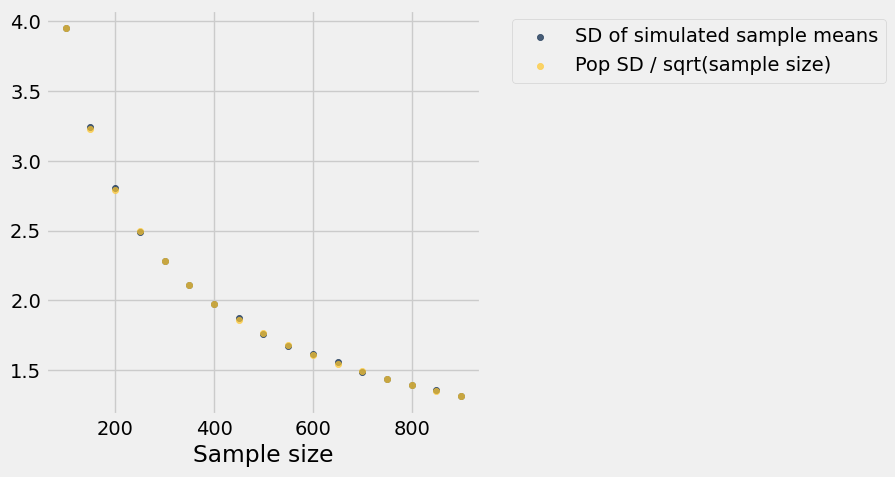

In [81]:
sd_table.scatter('Sample size')

## SD of 0/1 Population ##

In [82]:
# Population of size 10

number_of_ones = 5
zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))
zero_one_population

array([ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])

In [83]:
np.std(zero_one_population), np.mean(zero_one_population)

(0.5, 0.5)

In [84]:
# Let's make a graph with proportion of ones on the x axis and SD on the y axis

In [ ]:
def sd_of_zero_one_population(number_of_ones):
    """SD of a population with num_ones ones and (10 - num_ones) zeros"""
    zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))
    return np.std(zero_one_population)

In [ ]:
poss_ones = np.arange(11)
zero_one_pop = Table().with_columns(
    'Number of ones', poss_ones,
    'Proportion of ones', poss_ones / 10
)

In [ ]:
sds = zero_one_pop.apply(sd_of_zero_one_population, 'Number of ones')
zero_one_pop = zero_one_pop.with_column('SD', sds)

In [ ]:
zero_one_pop.scatter('Proportion of ones', 'SD')

## Prediction ##

In [ ]:
galton = Table.read_table('galton.csv')

In [ ]:
heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )

In [ ]:
heights

In [ ]:
heights.scatter('MidParent')

In [ ]:
def predict_child(h):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of h.
    
    The prediction is the average height of the children 
    whose midparent height is in the range h plus or minus 0.5 inches.
    """
    
    close_points = heights.where('MidParent', are.between(h-0.5, h + 0.5))
    return close_points.column('Child').mean()   

In [ ]:
heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
    )

In [ ]:
heights_with_predictions.scatter('MidParent')

## Association ##

In [ ]:
hybrid = Table.read_table('hybrid.csv')

In [ ]:
hybrid

In [ ]:
hybrid.sort('msrp', descending=True)

In [ ]:
hybrid.scatter('mpg', 'msrp')

In [ ]:
hybrid.scatter('acceleration', 'msrp')

In [ ]:
suv = hybrid.where('class', 'SUV')
suv.num_rows

In [ ]:
suv.scatter('acceleration', 'msrp')

In [ ]:
suv.scatter('mpg', 'msrp')

In [ ]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

In [ ]:
Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

In [ ]:
Table().with_columns(
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
    'msrp (standard units)',         standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

## Calculating $r$ ##

In [ ]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

In [ ]:
t.scatter('x', 'y', s=30, color='red')

In [ ]:
t = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t

In [ ]:
t = t.with_columns('product of standard units', t.column(2) * t.column(3))
t

In [ ]:
# r is the average of the products of the standard units

r = np.average(t.column(2) * t.column(3))
r

In [ ]:
def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)

In [ ]:
correlation(t, 'x', 'y')

In [ ]:
correlation(suv, 'mpg', 'msrp')

In [ ]:
correlation(suv, 'acceleration', 'msrp')